link to train_dff - https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv

In [1]:
!wget https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv

--2023-11-01 15:44:27--  https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419 [text/plain]
Saving to: ‘PlayTennis.csv’

PlayTennis.csv      100%[===================>]     419  --.-KB/s    in 0s      

2023-11-01 15:44:27 (4.61 MB/s) - ‘PlayTennis.csv’ saved [419/419]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("PlayTennis.csv")

In [4]:
train_df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
mapping = {"Sunny":1,"Overcast":2,"Rain":3}
train_df = train_df.replace({"Outlook":mapping})
mapping = {"Hot":1,"Mild":2,"Cool":3}
train_df = train_df.replace({"Temperature":mapping})
mapping = {"High":1,"Normal":2}
train_df = train_df.replace({"Humidity":mapping})
mapping = {"Strong":1,"Weak":2}
train_df = train_df.replace({"Wind":mapping})
mapping = {"Yes":1,"No":2}
train_df = train_df.replace({"Play Tennis":mapping})

In [6]:
train_df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,1,1,1,2,2
1,1,1,1,1,2
2,2,1,1,2,1
3,3,2,1,2,1
4,3,3,2,2,1


In [7]:
X = pd.DataFrame(train_df[['Outlook','Temperature','Humidity','Wind']])
Y = pd.DataFrame(train_df['Play Tennis'])

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dectreeclass = DecisionTreeClassifier(criterion = 'entropy')

In [9]:
dectreeclass.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9, 'x[2] <= 1.5\nentropy = 0.94\nsamples = 14\nvalue = [9, 5]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 2.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 2.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples

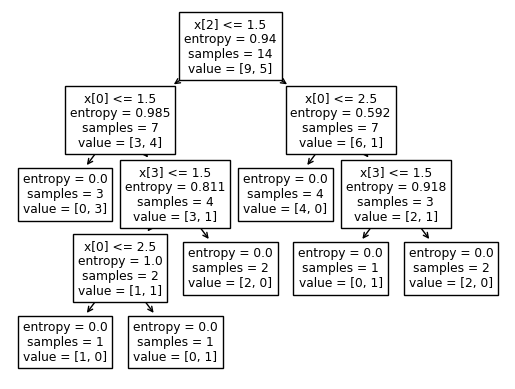

In [10]:
from sklearn.tree import plot_tree

plot_tree(dectreeclass)

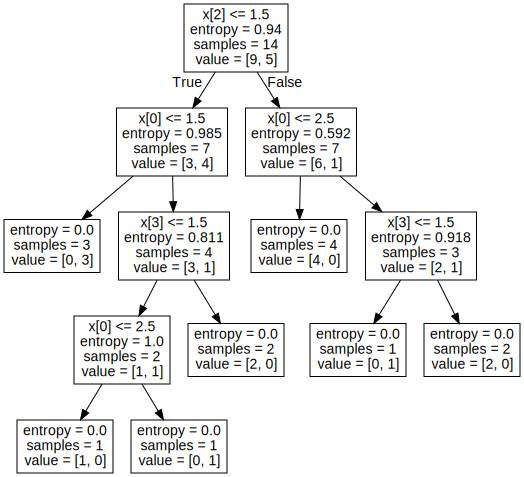

In [11]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dectreeclass, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [12]:
# The predictions are stored in X_pred
X_pred = dectreeclass.predict(X)


In [13]:
# verifying if the model has predicted it all right.
X_pred=X_pred.reshape(14,1)
X_pred == Y

,Play Tennis
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


Decision Tree Rules:
 |--- Tender Price <= 92500.00
|   |--- class: 2.0
|--- Tender Price >  92500.00
|   |--- Tender Price <= 135000.00
|   |   |--- class: 1.0
|   |--- Tender Price >  135000.00
|   |   |--- class: 3.0



[Text(0.4, 0.8333333333333334, 'Tender Price <= 92500.0\ngini = 0.653\nsamples = 7\nvalue = [2, 3, 2]\nclass = MS2 Only'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = MS2 Only'),
 Text(0.6, 0.5, 'Tender Price <= 135000.0\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]\nclass = MS1 Only'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = MS1 Only'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = MS1 and MS2')]

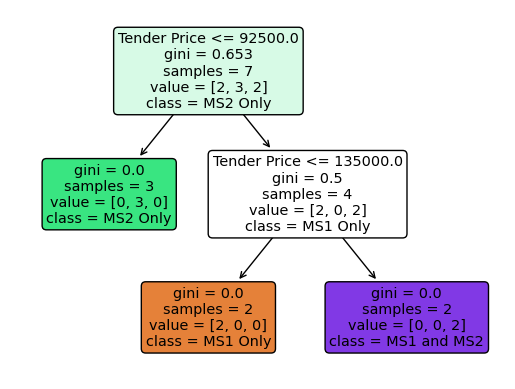

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Define the data
data = [
    [130000, 0.20, 1], [115000, 0.85, 1],
    [70000, 0.15, 2], [65000, 0.80, 2], [60000, 0.95, 2],
    [190000, 0.05, 3], [140000, 0.65, 3]
]

X = np.array(data)[:, :2]  # Input features: possible tender prices and probabilities
y = np.array(data)[:, 2]    # Output labels: 1 for MS1 only, 2 for MS2 only, 3 for both

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Visualize the decision tree
tree_rules = export_text(model, feature_names=['Tender Price', 'Probability'])
print("Decision Tree Rules:\n", tree_rules)

plot_tree(model, feature_names=['Tender Price', 'Probability'], class_names=['MS1 Only', 'MS2 Only', 'MS1 and MS2'], filled=True, rounded=True)


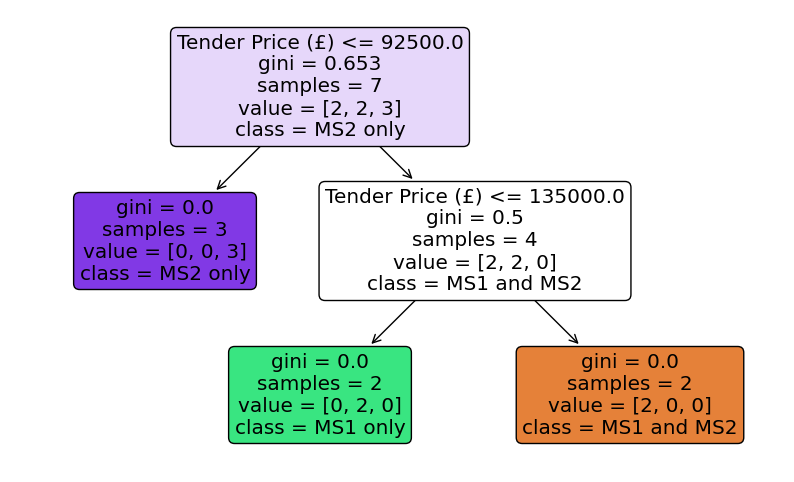

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [
    ["MS1 only", 130000, 0.20],
    ["MS1 only", 115000, 0.85],
    ["MS2 only", 70000, 0.15],
    ["MS2 only", 65000, 0.80],
    ["MS2 only", 60000, 0.95],
    ["MS1 and MS2", 190000, 0.05],
    ["MS1 and MS2", 140000, 0.65]
]

# Separate features (tender price) and labels (contract probability)
X = np.array([row[1] for row in data]).reshape(-1, 1)
y = np.array([row[0] for row in data])

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=["Tender Price (£)"], class_names=np.unique(y), rounded=True)
plt.show()


In [16]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the data
data = [
    ["MS1 only", 130000, 0.20],
    ["MS1 only", 115000, 0.85],
    ["MS2 only", 70000, 0.15],
    ["MS2 only", 65000, 0.80],
    ["MS2 only", 60000, 0.95],
    ["MS1 and MS2", 190000, 0.05],
    ["MS1 and MS2", 140000, 0.65]
]

# Separate features (tender price) and labels (contract option)
X = np.array([row[1] for row in data]).reshape(-1, 1)
y = np.array([row[0] for row in data])

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X, y)

# Define new tender prices to make predictions
new_tender_prices = np.array([160000, 55000, 100000]).reshape(-1, 1)

# Predict the best tender options for the new prices
predictions = clf.predict(new_tender_prices)

for price, prediction in zip(new_tender_prices, predictions):
    print(f"For a tender price of £{price[0]:,.2f}, the recommended option is: {prediction}")


For a tender price of £160,000.00, the recommended option is: MS1 and MS2
For a tender price of £55,000.00, the recommended option is: MS2 only
For a tender price of £100,000.00, the recommended option is: MS1 only
